# Text Mining 텍스트 마이닝 🔍🧠
- text: 문서, 기사 등 글자 데이터 📄
- mining: 채굴하다 ⛏️
- 텍스트 속에 숨겨진 의미, 패턴, 감정 등 중요한 정보를 찾아내는 과정 💡📊
## 텍스트 마이닝의 순서
- 텍스트 데이터에서의 의미를 추출하는 순서
- 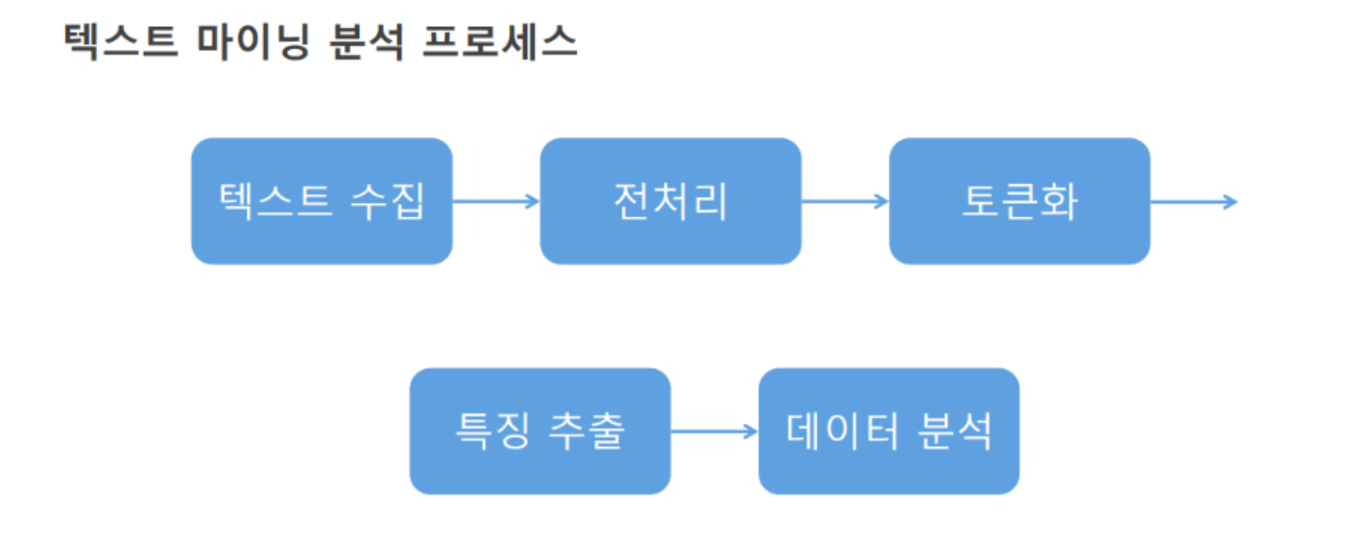
- 1) 텍스트 수집
    - 분석할 텍스트 데이터를 수집하는 단계
    - 예시
        - 고객 리뷰 10만개를 인터넷 쇼핑몰에서 긁어오기
        - 뉴스기사, sns글 수집
        - 설문조사에서 응답받은 자유형 텍스트 답변을 모아오기
- 2) 전처리
    - 텍스트를 깨끗하고 분석하기 좋은 상태로 정리
    - 예시 
        - 특수문자, 이모티콘 등 필요없는 텍스트를 정리
        - 맞춤법을 수정
        - 의미없는 단어 정리
- 3) 토큰화
    - 문장을 의미있는 작은 단위로 쪼개주는 단계
    - 예시
        - "이 제품 정말 좋아요" => ["이", "제품", "정말", "좋아요"]
        - 사과가 맛있어요 => 사과 + 가 + 맛있어요  => 형태소
- 4) 특징 추출
    - 텍스트를 수치데이터로 변환해서 컴퓨터가 이해하도록 만드는 단계
    - 예시
        - 단어 빈도수 세기
        - 단어 중요도 계산 => ... ㅎㅎㅎ
        - 감성 점수 부여 => 긍정/ 부정 점수를 부여한다.
        - 단어 임베딩 => 사과, 과일 : 사람이 봤을때는 비슷한 의미. 컴퓨터가 봤을때는 아예 다른 의미. 
- 5) 데이터 분석
    - 변환된 데이터를 사용해서 통계, 시각화, 머신러닝 등으로 이미있는 결과 도출하는 과정
    - 예시
        - 많이 나온 키워드로 시각화 => **워드클라우드**
        - 감성분석으로 고객 만족도를 파악



### 워드 클라우드 만들기 
- 워드 카운트: 문장에 등장하는 단어의 빈도를 분석
- 말뭉치(corpus): 분석에 활용할 문장 데이터셋(분석할 텍스트의 전체 묶음)
- 문서(Document): 말뭉치 내부에 들어있는 글 하나하나(텍스트자체, 리뷰 하나)
- naver_shopping.txt => 말뭉치

In [37]:
import os
os.getcwd()

'c:\\Users\\lgdx\\LG_DX_School\\01_Foundation\\python_lib'

In [38]:
import pandas as pd
naver_data = pd.read_csv("./data/naver_shopping.txt", delimiter = "\t", header = None)
naver_data.columns=["score", "review"]
naver_data.head()

,score,review
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [39]:
# 토큰화 : 문서에서 텍스트를 특정기준으로 쪼개주는 작업
# package를 이용한다. nltk module을 사용한다. 
import nltk #Natural Language(사람들이 일상에서 사용하는 언어) Toolkit
nltk.download("punkt_tab") # punkt_tab : 문장분리기! 사전학습된 모델 => 띄어쓰기, 문장부호를 기준으로 데이터를 나눠줌

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lgdx\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [40]:
# 토큰화 테스트
nltk.word_tokenize("택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고")

['택배가', '엉망이네용', '저희집', '밑에층에', '말도없이', '놔두고가고']

In [41]:
naver_review = naver_data["review"]
naver_review.head()

0                                              배공빠르고 굿
1                        택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2    아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3    선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4                    민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
Name: review, dtype: object

In [42]:
# 진생상황 보여주는 도구! 
# !pip install tqdm
from tqdm import tqdm

import time
for i in tqdm(range(50)):
    time.sleep(0.01)


100%|██████████| 50/50 [00:00<00:00, 95.00it/s]


In [43]:
#전체 문서에서 나온 모든 토큰들을 한 곳에 모아보자!
## 방법1  for 문을 사용해서 리스트 만들기

token_list = [] 

# 전체 리뷰를 순회하기
for doc in tqdm(naver_review):
    for token in nltk.word_tokenize(doc):
        token_list.append(token)

100%|██████████| 200000/200000 [00:07<00:00, 27963.58it/s]


In [44]:
## 방법2 for 문을 사용해서 리스트 만들기

from nltk import word_tokenize
token_list = [] 

# 전체 리뷰를 순회하기
for doc in tqdm(naver_review):
    for token in word_tokenize(doc):
        token_list.append(token)

100%|██████████| 200000/200000 [00:07<00:00, 27770.83it/s]


In [45]:
# 방법3 comprehension 사용하기
# 컴프리헨션 (comprehensive 포괄적인// comprehension 이해, 이해력 ) = fr 문을 사용해서 리스트, 딕셔너리 만들때 간결하게 코드 입력할 수 있는 방법
# https://wikidocs.net/22805

token_list_c = [token for doc in naver_review for token in word_tokenize(doc)]

#동작 원리
## naver_review의 각 리뷰(doc)를 하나씩 꺼냄
## 각 리뷰(doc)를 word_tokenize(doc)로 토큰(단어) 단위로 분리
## 분리된 각 토큰(token)을 리스트에 하나씩 추가
# 결과
## 모든 리뷰의 모든 토큰(단어)을 **하나의 리스트(token_list_c)**에 담음
## for문을 두 번 중첩해서 한 줄로 표현한 것

In [46]:
# 방법1
a = []
for i in [1,2,3,4,5]:
    a.append(i)
print(a)

# 방법2
a_c = [i for i in [1, 2, 3, 4, 5]]
print(a_c)




[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]


In [47]:
token_list_c  # 결과 확인

['배공빠르고',
 '굿',
 '택배가',
 '엉망이네용',
 '저희집',
 '밑에층에',
 '말도없이',
 '놔두고가고',
 '아주좋아요',
 '바지',
 '정말',
 '좋아서2개',
 '더',
 '구매했어요',
 '이가격에',
 '대박입니다',
 '.',
 '바느질이',
 '조금',
 '엉성하긴',
 '하지만',
 '편하고',
 '가성비',
 '최고예요',
 '.',
 '선물용으로',
 '빨리',
 '받아서',
 '전달했어야',
 '하는',
 '상품이었는데',
 '머그컵만',
 '와서',
 '당황했습니다',
 '.',
 '전화했더니',
 '바로주신다했지만',
 '배송도',
 '누락되어있었네요',
 '..',
 '확인안하고',
 '바로',
 '선물했으면',
 '큰일날뻔했네요',
 '..',
 '이렇게',
 '배송이',
 '오래걸렸으면',
 '사는거',
 '다시',
 '생각했을거같아요',
 '아쉽네요',
 '..',
 '민트색상',
 '예뻐요',
 '.',
 '옆',
 '손잡이는',
 '거는',
 '용도로도',
 '사용되네요',
 'ㅎㅎ',
 '비추합니다',
 '계란',
 '뒤집을',
 '때',
 '완전',
 '불편해요',
 'ㅠㅠ',
 '코팅도',
 '묻어나고',
 '보기엔',
 '예쁘고',
 '실용적으로',
 '보였는데',
 '생각보다',
 '진짜',
 '별로입니다',
 '.',
 '주문을',
 '11월6에',
 '시켰는데',
 '11월16일에',
 '배송이',
 '왔네요',
 'ㅎㅎㅎ',
 '여기',
 '회사측과는',
 '전화도',
 '안되고',
 '아무런',
 '연락을',
 '받을수가',
 '없으니',
 '답답하신',
 '분들은',
 '다른곳에서',
 '사시는거',
 '추천드립니다',
 '넉넉한',
 '길이로',
 '주문했는데도',
 '안',
 '맞네요',
 '별로예요',
 '보폴이',
 '계속',
 '때처럼',
 '나오다가',
 '지금은',
 '안나네요~',
 '110인데',
 '전문속옷브랜드',
 '위생팬티105보다',
 '작은듯해요',
 '.',


In [48]:
# raw data는 20만개였는데 token으로 쪼개지니 190만개가 나왔다. 
len(token_list)

1901794

In [49]:
# 빈도 수 세기
from collections import Counter # 데이터의 갯수를 셀 수 있는 도구

In [50]:
counter = Counter(token_list)

In [51]:
# daver_data 에서 재구매가 포함된 리뷰 갯수 boolean indexing => 재구매_df 변수에 대입
재구매_df = naver_data[naver_data["review"].str.contains("재구매")] 
재구매_df

,score,review
16,5,재구매 친구들이 좋은 향 난다고 해요
18,4,재구매 다 좋은데 하나가 이상하네요
24,5,재구매 늘 사는 흙이에요 팽이들이 젤 좋아해요 빠른배송 감사합니다
55,2,재구매 짱구오빠네 소개로 이용했는데 저번엔 괜찮은거 같아서 또 샀는데 기름만 엄청 ...
62,5,재구매 가게에서 사용중입니다. 안주디피할때 이쁩니다.
...,...,...
199946,2,재구매 두번째 시키는건데 항상보면 물건에 검정색 이물질이 묻어난게 많네요 지워지지도 않고
199949,5,재구매 ㅎㅎ자주 애용하고있습니당
199952,5,재구매 매번주문하는데 이번에도 잘구매했어요ㅎㅎ
199971,5,재구매 로션보단 크림이 더 보습이 좋아요^^


In [52]:
# 재구매와 연관된 단어를 파악하기! 
재구매_review = 재구매_df["review"]


# 재구매 리뷰에서 토큰화 방법3=> comprehension 사용
재구매_review_c = [token for i in 재구매_review for token in word_tokenize(i)]
# 재구매_review_c = [token for doc in 재구매_review for token in word_tokenize(doc)]
# 재구매 리뷰에서 토큰화 방법1=> 리스트 for문 사용
재구매_review_list =[]
for i in 재구매_review:
    # nltk.word_tokenize(i) # nltk를 사용해서 토큰화
    for token in word_tokenize(i):
        재구매_review_list.append(token)

재구매_review_list

['재구매',
 '친구들이',
 '좋은',
 '향',
 '난다고',
 '해요',
 '재구매',
 '다',
 '좋은데',
 '하나가',
 '이상하네요',
 '재구매',
 '늘',
 '사는',
 '흙이에요',
 '팽이들이',
 '젤',
 '좋아해요',
 '빠른배송',
 '감사합니다',
 '재구매',
 '짱구오빠네',
 '소개로',
 '이용했는데',
 '저번엔',
 '괜찮은거',
 '같아서',
 '또',
 '샀는데',
 '기름만',
 '엄청',
 '오고',
 '질겨서',
 '다',
 '뱉었네요',
 '..',
 '좋은상품주시지',
 '고객한명',
 '잃으셨네요',
 'ㅠ',
 '이제',
 '이용안하려고요',
 '재구매',
 '가게에서',
 '사용중입니다',
 '.',
 '안주디피할때',
 '이쁩니다',
 '.',
 '재구매',
 '3통짼대',
 '아주좋네요',
 '!',
 '강추',
 '재구매',
 '환불건',
 '처리해주세요',
 '.',
 '재구매',
 '항상믿고구매하는곳이라',
 '...',
 'ㅋ',
 '가격대비최고죵~~',
 '싸비스두최공~~',
 '재구매',
 '회사에서',
 '쓰는거라',
 '자주',
 '주문하고있어요',
 '.',
 '좀',
 '빨리',
 '떨어지는거',
 '같긴한데',
 '..',
 '그냥',
 '쓰고',
 '있어요',
 '.',
 '배송은',
 '빨라요',
 '재구매',
 '배송빠르고',
 '너무만족해용~',
 '재구매',
 '너무',
 '크네요',
 '..',
 '진짜생각보다',
 '너무큼',
 '장말좋아여',
 '엄마아빠도',
 '써보니까',
 '좋다고하시네요',
 '^^',
 '다',
 '쓰고',
 '나면',
 '재구매할게요',
 '많이',
 '파세요',
 '많이',
 '번창하세요',
 '포장도',
 '하나하나',
 '포장해주시고^^',
 '다른곳은',
 '레드장몽이라',
 '판매해서',
 '구매해보면',
 '레드가',
 '하나있고',
 '나머지는',
 '전부',
 '레드가',
 '아닌데',
 '여긴',
 '전부',
 '싱싱하

In [53]:
# 가장 많이 나온 단어 파악하기 =>재구매와 배송이 관련이 있을 수도 있겠다! 가설을 세울 수 있다.!  
재구매_counter = Counter(재구매_review_list)
freq_data = 재구매_counter.most_common(100)  # 상위 100개 단어의 빈도수 확인

# 워드 클라우드
- 단어의 빈도수에 따라 크기를 다르게 시각화 하는 방법


In [54]:
# !pip install wordcloud

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(font_path = "C://Windows/Fonts/malgun.ttf", # 글시체
               random_state=1, # 랜덤시드
               background_color= "white" # 배경색
               )

In [56]:
# 튜플 데이터를 딕셔너리 데이터로 변환시키기
test_data = [("좋아요",55), ("정말",47), ("맛있어요",45)]

#test_data를 딕셔너리로 변환
# a = {}
# a["name"] = "임보미"

test_dict = {}
for key,value in test_data:
    test_dict[key] = value

print(test_dict)

# 컴프리헨션으로 딕셔너리 만들기 
test_dict_c = {key:value for key,value in test_data}
print(test_dict_c)

{'좋아요': 55, '정말': 47, '맛있어요': 45}
{'좋아요': 55, '정말': 47, '맛있어요': 45}


In [57]:
test_dict = {"좋아요": 55, "정말": 47, "맛있어요": 45} # 빈도수를 임의로 만든 딕셔너리 
test_dict

{'좋아요': 55, '정말': 47, '맛있어요': 45}

In [58]:
wc_test = wc.generate_from_frequencies(test_dict)

In [59]:
import matplotlib.pyplot as plt

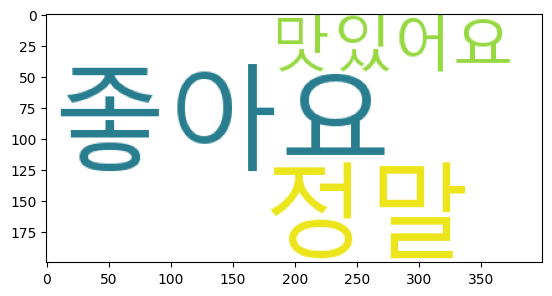

In [60]:
plt.imshow(wc_test)

In [66]:
# 
freq_dict = {key: value for key, value in freq_data}
freq_dict

{'재구매': 13832,
 '.': 5797,
 '!': 2490,
 '너무': 1526,
 '좋아요': 1479,
 '..': 1409,
 '잘': 1304,
 ',': 857,
 '...': 810,
 '항상': 744,
 '또': 580,
 '다': 571,
 '배송도': 508,
 '많이': 498,
 '더': 498,
 '좀': 465,
 '?': 465,
 '빠르고': 462,
 '배송': 442,
 '늘': 413,
 '계속': 399,
 '정말': 384,
 '있어요': 381,
 '그냥': 365,
 '맛있어요': 363,
 '좋아서': 350,
 '좋습니다': 348,
 '감사합니다': 339,
 '만족합니다': 338,
 '두번째': 331,
 '아주': 324,
 '배송이': 317,
 '있습니다': 313,
 '같아요': 303,
 '넘': 290,
 '좋고': 287,
 ';': 282,
 '먹고': 278,
 '매번': 271,
 '다시': 259,
 '의사': 247,
 '진짜': 242,
 '좋네요': 238,
 'ㅎㅎ': 238,
 '재구매는': 226,
 '맛이': 223,
 'ㅠㅠ': 223,
 '여기서': 218,
 '재구매의사': 213,
 '맛도': 210,
 '믿고': 202,
 '재구매했어요': 194,
 '맛있어서': 191,
 '이번엔': 189,
 '했는데': 189,
 '합니다': 187,
 '주문했는데': 185,
 '다른': 183,
 '....': 183,
 '이번에': 179,
 '제품': 179,
 '완전': 178,
 '것': 177,
 '쓰고': 176,
 '구매': 174,
 '구매했는데': 168,
 '조금': 167,
 '좋은': 160,
 '포장도': 159,
 '저번에': 159,
 '자주': 158,
 '가격도': 155,
 '맛있게': 155,
 '재구매합니다': 152,
 '맘에': 150,
 '있어서': 150,
 '엄청': 149,
 '입니다': 149,
 '꾸준히': 147,

In [67]:
rs = wc.generate_from_frequencies(freq_dict)

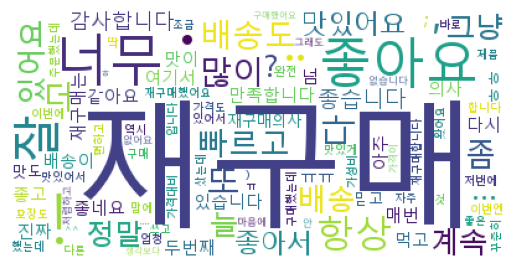

In [71]:
plt.imshow(rs)
plt.axis("off") # x축 y축 삭제
plt.show()